In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize, least_squares

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
data_filename = 'data/30_300_0.5.npy'
amplitude = np.load(data_filename)

In [3]:
frequency = np.linspace(30, 300, amplitude.size)

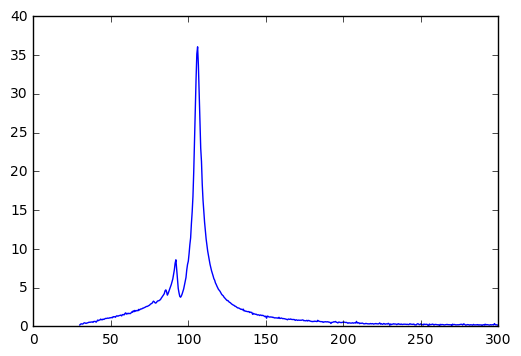

In [4]:
plt.plot(frequency, amplitude)

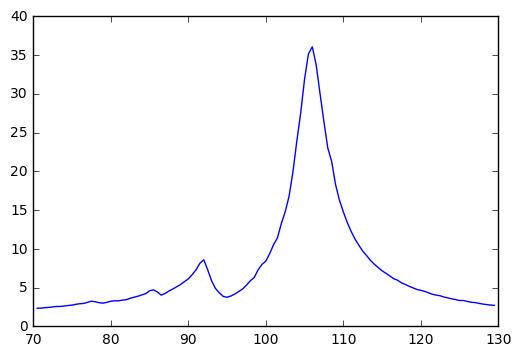

In [5]:
width = 30
center = 100
subset_frequency = frequency[np.abs(frequency-center)<width]
subset_amplitude = amplitude[np.abs(frequency-center)<width]
plt.plot(
    frequency[np.abs(frequency-center)<width],
    amplitude[np.abs(frequency-center)<width])

In [6]:
def error_func_all(x, subset_frequency, subset_amplitude):
    a1, b1, c1 = x[0], x[1], x[2]
    gaussian_1 = a1*np.exp(-np.square(subset_frequency-b1)/(2.*c1**2.))
    a2, b2, c2 = x[3], x[4], x[5]
    gaussian_2 = a2*np.exp(-np.square(subset_frequency-b2)/(2.*c2**2.))
    a3, b3 = x[6], x[7]
    linear_fit = a3*subset_frequency + b3
    return np.sum(np.square(gaussian_1+gaussian_2+linear_fit-subset_amplitude))

def error_func(x, subset_frequency, subset_amplitude, number_lorentzians):
    lorentzians = []
    for i in range(number_lorentzians):
        a, b, c = x[0+i], x[1+i], x[2+i]#x[0], x[1], x[2]
        lorentzians.append(a**2./(np.square(subset_frequency-b)+c**2.))
    return np.sum(np.square(np.sum(lorentzians, 0)-subset_amplitude))

number_lorentzians = 5
fitting = minimize(
    error_func, 
    x0=[
    10, 106, 3,
    8, 95, 3,
    5, 86, 3,
    1, 106, 3,
    1, 106, 3
    ], 
    args=(subset_frequency, subset_amplitude, number_lorentzians), 
    method="Nelder-Mead", tol=1e-7, options={'maxiter':15000})
x = fitting.x
x

array([  12.50191756,  105.94491734,    2.32007742,   27.72508753,
        108.59113889,   11.82073823,  110.02268414,  329.15509465,
        -36.18457126,    4.07132476, -347.44552463,    1.33849582,
         11.57825273,   81.44405318,  -72.08625603])

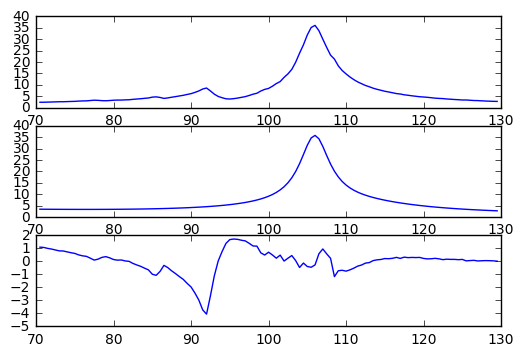

In [7]:
lorentzians = []
for i in range(number_lorentzians):
    a, b, c = x[0+i], x[1+i], x[2+i]#x[0], x[1], x[2]
    lorentzians.append(a**2./(np.square(subset_frequency-b)+c**2.))
plt.subplot(311)
plt.plot(
    subset_frequency,
    subset_amplitude)
plt.subplot(312)
plt.plot(
    subset_frequency,
    np.sum(lorentzians, 0))
plt.subplot(313)
plt.plot(
    subset_frequency,
    np.sum(lorentzians, 0)-subset_amplitude)

12.5019175622 105.944917339 2.32007741741
27.7250875301 108.591138895 11.8207382274


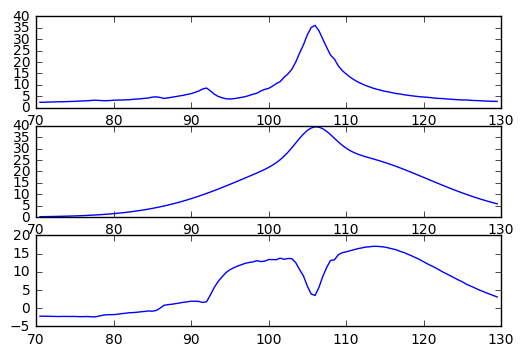

In [8]:
a, b, c = x[0], x[1], x[2]
print(a, b, c)
gaussian_1 = a*np.exp(-np.square(subset_frequency-b)/(2.*c**2.))
a, b, c = x[3], x[4], x[5]
print(a, b, c)
gaussian_2 = a*np.exp(-np.square(subset_frequency-b)/(2.*c**2.))
a, b = x[6], x[7]
linear_fit = 0#a*subset_frequency + b
plt.subplot(311)
plt.plot(
    subset_frequency,
    subset_amplitude)
plt.subplot(312)
plt.plot(
    subset_frequency,
    gaussian_1+gaussian_2+linear_fit)
plt.subplot(313)
plt.plot(
    subset_frequency,
    gaussian_1+gaussian_2+linear_fit-subset_amplitude)